In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation,BatchNormalization
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
#Matplotlib relies on the Pillow library to load image data.

# import the opencv library
import cv2

In [2]:
dimension = 64

In [3]:
data=pd.read_csv("dataset/dataset64.csv")

In [4]:
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))
data['pixels'] = data['pixels'].apply(lambda x: x/255)
X = np.array(data['pixels'].tolist())

In [5]:
X.shape[0]

23103

In [6]:
X = X.reshape(X.shape[0],dimension,dimension,1)
y = data['gender']

X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size=0.1, random_state=22)

48 Gender :
gender_sgd_val_66.h5
gender_sgd_val_68.h5
gender_sgd_val_88.h5
gender_sgd_val_89_ac_96.h5

In [11]:
model = Sequential()
#kernal size is the size that u want to select when convulating and stride is how much u want to shift the kernal 
model.add(Conv2D(64,(3,3),input_shape=(X.shape[1:]))) # 64 neurons with 3*3 filter
# create convolutional neural network to extract feature from the images
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # to reduce size of image
model.add(BatchNormalization(axis=1))
# model1.add(Dropout(0.1)) # if our model learns a lot we need to remove some nodes.

model.add(Conv2D(128,(3,3),input_shape=(X.shape[1:]))) # 64 neurons with 3*3 filter
# create convolutional neural network to extract feature from the images
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # to reduce size of image
# model1.add(Dropout(0.1))

model.add(Flatten()) # flat 2nd last layer to vertical
model.add(Dense(64)) # 64 neurons with 3*3 filter
# no. of output modes in hiden layers
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(1)) # output layer (1 neuron at last)
model.add(Activation('sigmoid')) # put output single node as sigmoid value(0 to 1 in decimal)
# if you want output single node as 0 or 1 -> use softmax

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 64)        124       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0

In [27]:
model = keras.models.load_model('GenderModel/gender64-1.h5')

In [28]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.0001, decay=1e-6,momentum=0.5,nesterov=True)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test), batch_size=8)

Epoch 1/10
2599/2599 [==============================] - 319s 122ms/step - loss: 0.0527 - accuracy: 0.9802 - val_loss: 0.5962 - val_accuracy: 0.8827
Epoch 2/10
2599/2599 [==============================] - 300s 116ms/step - loss: 0.0493 - accuracy: 0.9803 - val_loss: 0.5889 - val_accuracy: 0.8845
Epoch 3/10
2599/2599 [==============================] - 300s 115ms/step - loss: 0.0480 - accuracy: 0.9815 - val_loss: 0.5845 - val_accuracy: 0.8862
Epoch 4/10
2599/2599 [==============================] - 300s 115ms/step - loss: 0.0445 - accuracy: 0.9830 - val_loss: 0.5813 - val_accuracy: 0.8840
Epoch 5/10
2599/2599 [==============================] - 300s 115ms/step - loss: 0.0440 - accuracy: 0.9836 - val_loss: 0.5816 - val_accuracy: 0.8840
Epoch 6/10
2599/2599 [==============================] - 298s 115ms/step - loss: 0.0438 - accuracy: 0.9836 - val_loss: 0.5817 - val_accuracy: 0.8840
Epoch 7/10
2599/2599 [==============================] - 299s 115ms/step - loss: 0.0435 - accuracy: 0.9839 - val_

In [29]:
model.save('GenderModel/gender64-1.h5')

In [14]:
model = Sequential()
model.add(Conv2D(input_shape=(X.shape[1:]),filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [39]:
model = keras.models.load_model('GenderModel/gender64-2point1.h5')

In [41]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.0001, decay=1e-4,momentum=0.5,nesterov=True)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history1 = model.fit(X_train, y_train, epochs=5,validation_data=(X_test,y_test), batch_size=8)

Epoch 1/5
2599/2599 [==============================] - 127s 48ms/step - loss: 0.5635 - accuracy: 0.7100 - val_loss: 0.5753 - val_accuracy: 0.6967
Epoch 2/5
2599/2599 [==============================] - 129s 50ms/step - loss: 0.5601 - accuracy: 0.7121 - val_loss: 0.5727 - val_accuracy: 0.6971
Epoch 3/5
2599/2599 [==============================] - 133s 51ms/step - loss: 0.5569 - accuracy: 0.7146 - val_loss: 0.5697 - val_accuracy: 0.6954
Epoch 4/5
2599/2599 [==============================] - 135s 52ms/step - loss: 0.5546 - accuracy: 0.7187 - val_loss: 0.5700 - val_accuracy: 0.6945
Epoch 5/5
2599/2599 [==============================] - 131s 50ms/step - loss: 0.5523 - accuracy: 0.7180 - val_loss: 0.5661 - val_accuracy: 0.6984


In [42]:
model.save('GenderModel/gender64-2point1.h5')

In [26]:
# comment
model = keras.models.load_model('GenderModel/gender64_sgd_val_9152_ac_9964.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 64)        640       
_________________________________________________________________
activation_8 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 31, 31, 64)        124       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
activation_9 (Activation)    (None, 29, 29, 128)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)      

In [ ]:
# comment
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.005, decay=1e-6,momentum=0.9,nesterov=True)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history2 = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test), batch_size=32)

In [75]:
# comment
model.save('GenderModel/gender64_sgd_val_91_ac_99.h5')

In [10]:
# comment
model = keras.models.load_model('GenderModel/gender64_sgd_val_9152_ac_9964.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 64)        640       
_________________________________________________________________
activation_8 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 31, 31, 64)        124       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
activation_9 (Activation)    (None, 29, 29, 128)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)      

In [ ]:
# comment
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.0001, decay=1e-6,momentum=0.9,nesterov=True)
# model = keras.models.load_model('GenderModel/gender_sgd_val_89_ac_96.h5')
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history3 = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test), batch_size=8)

In [ ]:
# comment
model.save('GenderModel/gender64_sgd_val_9152_ac_9964.h5')

In [43]:
history.history.keys()
history1.history.keys()
# history2.history.keys()
# history3.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

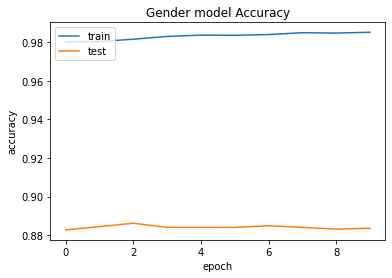

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Gender model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

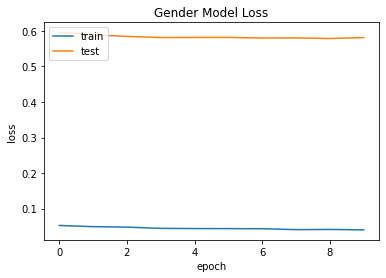

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Gender Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

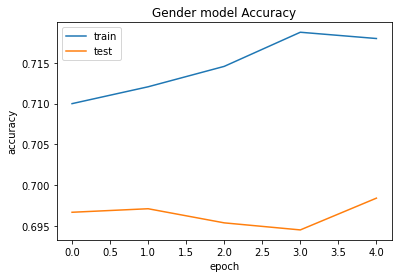

In [44]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Gender model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

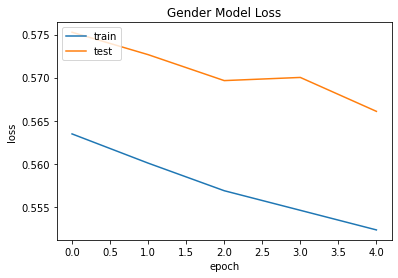

In [45]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Gender Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Gender Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Gender model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Gender Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

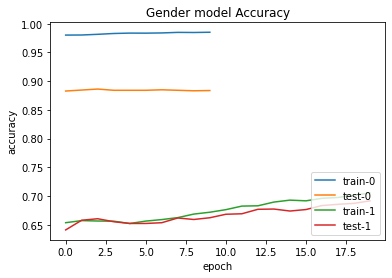

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
# plt.plot(history2.history['accuracy'])
# plt.plot(history2.history['val_accuracy'])
# plt.plot(history3.history['accuracy'])
# plt.plot(history3.history['val_accuracy'])
plt.title('Gender model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train-0','test-0','train-1','test-1'],loc='lower right')
plt.show()

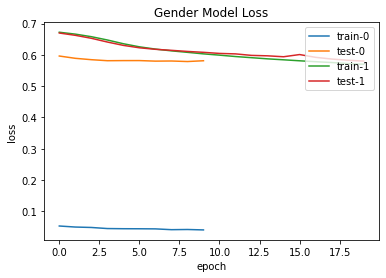

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
# plt.plot(history2.history['loss'])
# plt.plot(history2.history['val_loss'])
# plt.plot(history3.history['loss'])
# plt.plot(history3.history['val_loss'])
plt.title('Gender Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train-0','test-0','train-1','test-1'],loc='upper right')
plt.show()